# 코호트(Cohort) 분석

In [403]:
import pandas as pd

In [404]:
df = pd.read_csv('event_log.csv')

In [405]:
df['event_time_dtm_format'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S %Z')

In [406]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06+00:00
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26+00:00
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27+00:00
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33+00:00
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36+00:00


In [407]:
df.event_time_dtm_format.dtypes

datetime64[ns, UTC]

## 처음 구매한 사람이 시간이 지남에 따라 재구매를 어떻게 하는지 패턴을 파악

In [408]:
df['order_month'] = df['event_time_dtm_format'].dt.strftime('%Y-%m')

In [409]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_dtm_format,order_month
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06+00:00,2020-09
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26+00:00,2020-09
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27+00:00,2020-09
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33+00:00,2020-09
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36+00:00,2020-09


In [410]:
order_data = df[df.event_type == 'purchase']

In [411]:
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_dtm_format,order_month
45,2020-09-24 12:04:10 UTC,purchase,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,xn6SHCnZtk,2020-09-24 12:04:10+00:00,2020-09
82,2020-09-24 12:15:06 UTC,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,2020-09-24 12:15:06+00:00,2020-09
100,2020-09-24 12:19:01 UTC,purchase,4060928,2144415927049912542,electronics.video.tv,NaN,89.22,1515915625518130982,3yFCkx2KKW,2020-09-24 12:19:01+00:00,2020-09
132,2020-09-24 12:25:18 UTC,purchase,4060928,2144415927049912542,electronics.video.tv,NaN,89.22,1515915625518130982,3yFCkx2KKW,2020-09-24 12:25:18+00:00,2020-09
150,2020-09-24 12:29:49 UTC,purchase,1283197,2144415973413749245,computers.peripherals.nas,zyxel,123.79,1515915625519356010,3jFpdbozOd,2020-09-24 12:29:49+00:00,2020-09


In [412]:
order_data.set_index('user_id', inplace=True)

In [413]:
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_time_dtm_format,order_month
user_id,,,,,,,,,,
1515915625519390468,2020-09-24 12:04:10 UTC,purchase,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,xn6SHCnZtk,2020-09-24 12:04:10+00:00,2020-09
1515915625513574486,2020-09-24 12:15:06 UTC,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,2gngxS29Ts,2020-09-24 12:15:06+00:00,2020-09
1515915625518130982,2020-09-24 12:19:01 UTC,purchase,4060928,2144415927049912542,electronics.video.tv,NaN,89.22,3yFCkx2KKW,2020-09-24 12:19:01+00:00,2020-09
1515915625518130982,2020-09-24 12:25:18 UTC,purchase,4060928,2144415927049912542,electronics.video.tv,NaN,89.22,3yFCkx2KKW,2020-09-24 12:25:18+00:00,2020-09
1515915625519356010,2020-09-24 12:29:49 UTC,purchase,1283197,2144415973413749245,computers.peripherals.nas,zyxel,123.79,3jFpdbozOd,2020-09-24 12:29:49+00:00,2020-09


In [414]:
first_order = order_data.groupby(order_data.index)['order_month'].min()

In [415]:
order_data = order_data.merge(first_order.rename('first_order_month').to_frame(), left_index=True, right_index=True)

In [416]:
order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_time_dtm_format,order_month,first_order_month
user_id,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03 11:23:44+00:00,2020-10,2020-10
1515915625353457259,2020-09-29 05:52:55 UTC,purchase,137302,2144415924491387038,computers.components.motherboard,asus,55.16,kD2TVJlla1,2020-09-29 05:52:55+00:00,2020-09,2020-09
1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:01:55+00:00,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:03:42+00:00,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:29:25+00:00,2020-10,2020-10


In [417]:
order_data.reset_index(inplace=True)

In [418]:
order_data.head()

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_time_dtm_format,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03 11:23:44+00:00,2020-10,2020-10
1,1515915625353457259,2020-09-29 05:52:55 UTC,purchase,137302,2144415924491387038,computers.components.motherboard,asus,55.16,kD2TVJlla1,2020-09-29 05:52:55+00:00,2020-09,2020-09
2,1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:01:55+00:00,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:03:42+00:00,2020-10,2020-10
4,1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06 10:29:25+00:00,2020-10,2020-10


In [419]:
grouped = order_data.groupby(['first_order_month', 'order_month'])

In [420]:
cohorts = grouped.user_id.nunique()

In [421]:
cohorts.head()

first_order_month  order_month
2020-09            2020-09        627
                   2020-10         24
                   2020-11          5
                   2020-12          2
                   2021-01          1
Name: user_id, dtype: int64

In [422]:
cohorts = cohorts.reset_index()

In [423]:
cohorts.head()

,first_order_month,order_month,user_id
0,2020-09,2020-09,627
1,2020-09,2020-10,24
2,2020-09,2020-11,5
3,2020-09,2020-12,2
4,2020-09,2021-01,1


In [424]:
cohorts.rename({'user_id': 'total_users'}, axis=1, inplace=True)

In [425]:
cohorts.head()

,first_order_month,order_month,total_users
0,2020-09,2020-09,627
1,2020-09,2020-10,24
2,2020-09,2020-11,5
3,2020-09,2020-12,2
4,2020-09,2021-01,1


In [426]:
each_period = cohorts.first_order_month.value_counts().sort_index()
each_period

2020-09    5
2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_order_month, dtype: int64

In [427]:
cohorts.first_order_month.dtype

dtype('O')

첫 구매월과 구매월의 차이를 계산하기 위해 string을 datetime으로 바꾸고, to_period 함수를 이용해 차이를 계산한다.

In [428]:
cohorts['first_order_month_dt'] = pd.to_datetime(cohorts.first_order_month, format='%Y-%m')
cohorts['order_month_dt'] = pd.to_datetime(cohorts.order_month, format='%Y-%m')

In [429]:
cohorts.first_order_month_dt.dtype, cohorts.order_month_dt.dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [430]:
cohorts.head()

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt
0,2020-09,2020-09,627,2020-09-01,2020-09-01
1,2020-09,2020-10,24,2020-09-01,2020-10-01
2,2020-09,2020-11,5,2020-09-01,2020-11-01
3,2020-09,2020-12,2,2020-09-01,2020-12-01
4,2020-09,2021-01,1,2020-09-01,2021-01-01


In [431]:
cohorts.order_month_dt.dt.to_period('M')

0     2020-09
1     2020-10
2     2020-11
3     2020-12
4     2021-01
5     2020-10
6     2020-11
7     2020-12
8     2021-01
9     2021-02
10    2020-11
11    2020-12
12    2021-01
13    2021-02
14    2020-12
15    2021-01
16    2021-02
17    2021-01
18    2021-02
19    2021-02
Name: order_month_dt, dtype: period[M]

period를 int로 바꾸면 월수로 변경됨

In [432]:
cohorts.order_month_dt.dt.to_period('M').astype(int)

0     608
1     609
2     610
3     611
4     612
5     609
6     610
7     611
8     612
9     613
10    610
11    611
12    612
13    613
14    611
15    612
16    613
17    612
18    613
19    613
Name: order_month_dt, dtype: int64

In [433]:
cohorts['month_diff'] = cohorts.order_month_dt.dt.to_period('M').astype(int) - cohorts.first_order_month_dt.dt.to_period('M').astype(int)

In [434]:
cohorts.head()

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-09,2020-09,627,2020-09-01,2020-09-01,0
1,2020-09,2020-10,24,2020-09-01,2020-10-01,1
2,2020-09,2020-11,5,2020-09-01,2020-11-01,2
3,2020-09,2020-12,2,2020-09-01,2020-12-01,3
4,2020-09,2021-01,1,2020-09-01,2021-01-01,4


In [435]:
cohorts = cohorts[['first_order_month', 'month_diff', 'total_users']]
cohorts.set_index(['first_order_month', 'month_diff'], inplace=True)
cohorts

total_users
first_order_month month_diff             
2020-09           0                   627
                  1                    24
                  2                     5
                  3                     2
                  4                     1
2020-10           0                  3772
                  1                    65
                  2                    17
                  3                     3
                  4                     4
2020-11           0                  4258
                  1                    68
                  2                    26
                  3                     7
2020-12           0                  3782
                  1                    68
                  2                    21
2021-01           0                  4673
                  1                   117
2021-02           0                  4192

In [436]:
cohorts = cohorts['total_users'].unstack(1)
cohorts

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-09,627.0,24.0,5.0,2.0,1.0
2020-10,3772.0,65.0,17.0,3.0,4.0
2020-11,4258.0,68.0,26.0,7.0,NaN
2020-12,3782.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


구매 유저수 => 재구매율로 표현하기

In [437]:
reorder_rate = cohorts.divide(cohorts[0], axis=0)
reorder_rate

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-09,1.0,0.038278,0.007974,0.003190,0.001595
2020-10,1.0,0.017232,0.004507,0.000795,0.001060
2020-11,1.0,0.015970,0.006106,0.001644,NaN
2020-12,1.0,0.017980,0.005553,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


In [438]:
reorder_rate = reorder_rate.iloc[1:-1, 1:]
reorder_rate

month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017232,0.004507,0.000795,0.00106
2020-11,0.015970,0.006106,0.001644,NaN
2020-12,0.017980,0.005553,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN


In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(29.5, 0.5, '첫 구매월')

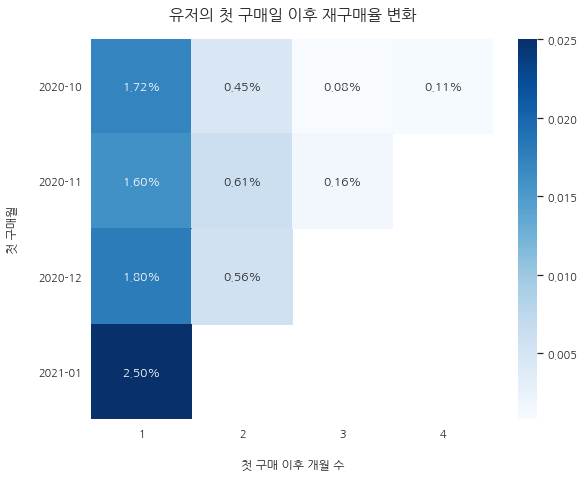

In [482]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')

g = sns.heatmap(reorder_rate, annot=True, fmt='.2%', cmap='Blues')
plt.yticks(rotation=0)

g.figure.set_size_inches(9, 7)
g.set_title('유저의 첫 구매일 이후 재구매율 변화', pad=20, size=16)
g.set_xlabel('첫 구매 이후 개월 수', labelpad=20, size=12)
g.set_ylabel('첫 구매월', labelpad=20, size=12)

## 재방문율을 cohort 그래프로 그려보기

In [441]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_dtm_format,order_month
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24 11:57:06+00:00,2020-09
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24 11:57:26+00:00,2020-09
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24 11:57:27+00:00,2020-09
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24 11:57:33+00:00,2020-09
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24 11:57:36+00:00,2020-09


방문은 어떤 이벤트라도 발생하면 방문으로 정의한다

In [442]:
df = df.rename(columns={'order_month': 'year_month'})

In [443]:
visit_data = df[['event_time', 'user_id', 'user_session', 'year_month']]
visit_data.set_index('user_id', inplace=True)
visit_data.head()

,event_time,user_session,year_month
user_id,,,
1515915625519388267,2020-09-24 11:57:06 UTC,LJuJVLEjPT,2020-09
1515915625519380411,2020-09-24 11:57:26 UTC,tdicluNnRY,2020-09
1515915625513238515,2020-09-24 11:57:27 UTC,4TMArHtXQy,2020-09
1515915625519014356,2020-09-24 11:57:33 UTC,aGFYrNgC08,2020-09
1515915625510743344,2020-09-24 11:57:36 UTC,aa4mmk0kwQ,2020-09


In [444]:
first_visit = visit_data.groupby(visit_data.index)['year_month'].min()

In [445]:
visit_data = visit_data.merge(first_visit.rename('first_visit_month').to_frame(), left_index=True, right_index=True)

In [446]:
visit_data.reset_index(inplace=True)

In [447]:
visit_data.head()

,user_id,event_time,user_session,year_month,first_visit_month
0,1515915625353226922,2020-10-29 11:28:35 UTC,7qejzWzHlR,2020-10,2020-10
1,1515915625353230067,2020-10-06 06:30:32 UTC,ikPKHkuRhA,2020-10,2020-10
2,1515915625353230683,2020-11-09 08:52:51 UTC,dn9FkZ11dA,2020-11,2020-11
3,1515915625353230683,2020-11-09 09:04:34 UTC,dn9FkZ11dA,2020-11,2020-11
4,1515915625353230683,2020-11-09 09:08:53 UTC,dn9FkZ11dA,2020-11,2020-11


In [448]:
grouped = visit_data.groupby(['first_visit_month', 'year_month'])

In [449]:
cohorts = grouped.user_id.nunique()

In [450]:
cohorts

first_visit_month  year_month
2020-09            2020-09       15334
                   2020-10         955
                   2020-11         267
                   2020-12         119
                   2021-01          98
                   2021-02          72
2020-10            2020-10       83261
                   2020-11        2227
                   2020-12         678
                   2021-01         444
                   2021-02         279
2020-11            2020-11       90106
                   2020-12        1867
                   2021-01         792
                   2021-02         552
2020-12            2020-12       69473
                   2021-01        1644
                   2021-02         710
2021-01            2021-01       78278
                   2021-02        2162
2021-02            2021-02       70831
Name: user_id, dtype: int64

In [451]:
cohorts = cohorts.reset_index()

In [452]:
cohorts.head()

,first_visit_month,year_month,user_id
0,2020-09,2020-09,15334
1,2020-09,2020-10,955
2,2020-09,2020-11,267
3,2020-09,2020-12,119
4,2020-09,2021-01,98


In [453]:
cohorts = cohorts[cohorts.first_visit_month > '2020-09']

In [454]:
cohorts.head()

,first_visit_month,year_month,user_id
6,2020-10,2020-10,83261
7,2020-10,2020-11,2227
8,2020-10,2020-12,678
9,2020-10,2021-01,444
10,2020-10,2021-02,279


In [455]:
cohorts.rename({'user_id': 'total_users'}, axis=1, inplace=True)

In [456]:
cohorts.head()

,first_visit_month,year_month,total_users
6,2020-10,2020-10,83261
7,2020-10,2020-11,2227
8,2020-10,2020-12,678
9,2020-10,2021-01,444
10,2020-10,2021-02,279


In [457]:
cohorts.first_visit_month.value_counts().sort_index()

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_visit_month, dtype: int64

In [458]:
cohorts['first_visit_month_dt'] = pd.to_datetime(cohorts.first_visit_month, format='%Y-%m')
cohorts['year_month_dt'] = pd.to_datetime(cohorts.year_month, format='%Y-%m')
cohorts['month_diff'] = cohorts.year_month_dt.dt.to_period('M').astype(int) - cohorts.first_visit_month_dt.dt.to_period('M').astype(int)

In [459]:
cohorts

,first_visit_month,year_month,total_users,first_visit_month_dt,year_month_dt,month_diff
6,2020-10,2020-10,83261,2020-10-01,2020-10-01,0
7,2020-10,2020-11,2227,2020-10-01,2020-11-01,1
8,2020-10,2020-12,678,2020-10-01,2020-12-01,2
9,2020-10,2021-01,444,2020-10-01,2021-01-01,3
10,2020-10,2021-02,279,2020-10-01,2021-02-01,4
11,2020-11,2020-11,90106,2020-11-01,2020-11-01,0
12,2020-11,2020-12,1867,2020-11-01,2020-12-01,1
13,2020-11,2021-01,792,2020-11-01,2021-01-01,2
14,2020-11,2021-02,552,2020-11-01,2021-02-01,3
15,2020-12,2020-12,69473,2020-12-01,2020-12-01,0


In [460]:
cohorts = cohorts[['first_visit_month', 'month_diff', 'total_users']]
cohorts.set_index(['first_visit_month', 'month_diff'], inplace=True)
cohorts

total_users
first_visit_month month_diff             
2020-10           0                 83261
                  1                  2227
                  2                   678
                  3                   444
                  4                   279
2020-11           0                 90106
                  1                  1867
                  2                   792
                  3                   552
2020-12           0                 69473
                  1                  1644
                  2                   710
2021-01           0                 78278
                  1                  2162
2021-02           0                 70831

In [461]:
cohorts = cohorts['total_users'].unstack(1)
cohorts

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,83261.0,2227.0,678.0,444.0,279.0
2020-11,90106.0,1867.0,792.0,552.0,NaN
2020-12,69473.0,1644.0,710.0,NaN,NaN
2021-01,78278.0,2162.0,NaN,NaN,NaN
2021-02,70831.0,NaN,NaN,NaN,NaN


In [462]:
revisit_rate = cohorts.divide(cohorts[0], axis=0)
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2020-10,1.0,0.026747,0.008143,0.005333,0.003351
2020-11,1.0,0.020720,0.008790,0.006126,NaN
2020-12,1.0,0.023664,0.010220,NaN,NaN
2021-01,1.0,0.027620,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


Text(29.5, 0.5, '첫 방문월')

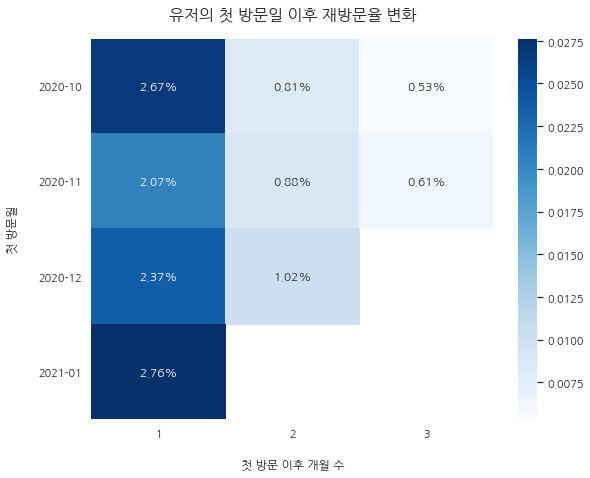

In [486]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')

g = sns.heatmap(revisit_rate.iloc[:-1, 1:-1], annot=True, fmt='.2%', cmap='Blues')
plt.yticks(rotation=0)

g.figure.set_size_inches(9, 7)
g.set_title('유저의 첫 방문일 이후 재방문율 변화', pad=20, size=16)
g.set_xlabel('첫 방문 이후 개월 수', labelpad=20, size=12)
g.set_ylabel('첫 방문월', labelpad=20, size=12)